In [1]:
import kagglehub
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'creditcardfraud' dataset.
Path to dataset files: /kaggle/input/creditcardfraud


In [2]:
!pip install -q imbalanced-learn==0.11.0 shap==0.42.1 streamlit-ngrok pyngrok xgboost
!pip install -q yellowbrick

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 402.7/402.7 kB 9.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
ERROR: Could not find a version that satisfies the requirement streamlit-ngrok (from versions: none)
ERROR: No matching distribution found for streamlit-ngrok


In [3]:
import os, zipfile, glob, shutil
def extract_or_find_csv(p):
    if os.path.isfile(p) and p.lower().endswith(".zip"):
        with zipfile.ZipFile(p, 'r') as z:
            z.extractall("/content/creditcard_dataset")
        files = glob.glob("/content/creditcard_dataset/**/*.csv", recursive=True) + glob.glob("/content/creditcard_dataset/*.csv")
        if not files:
            raise FileNotFoundError("No CSV found in the ZIP archive.")
        return files[0]
    elif os.path.isdir(p):
        files = glob.glob(os.path.join(p, "**", ".csv"), recursive=True) + glob.glob(os.path.join(p, "*.csv"))
        if not files:
            raise FileNotFoundError("No CSV found in the folder.")
        return files[0]
    elif os.path.isfile(p) and p.lower().endswith(".csv"):
        return p
    else:
        raise FileNotFoundError(f"Could not find dataset at {p}")

path = "/kaggle/input/creditcardfraud"
csv_path = extract_or_find_csv(path)
print("Using CSV:", csv_path)

import pandas as pd
df = pd.read_csv(csv_path)
print("Rows, cols:", df.shape)
df.head()

Using CSV: /kaggle/input/creditcardfraud/creditcard.csv
Rows, cols: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


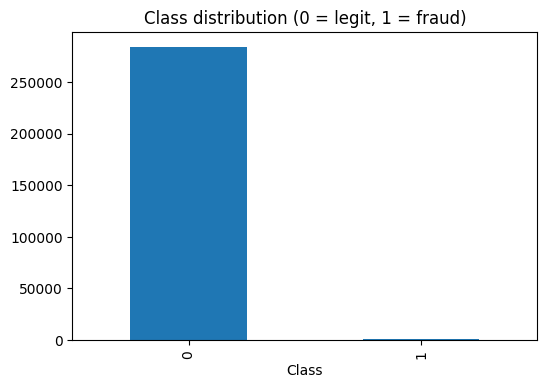

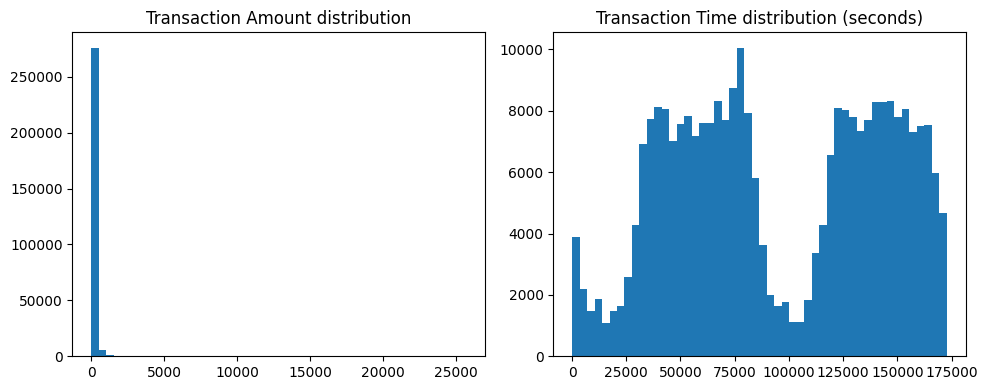

In [4]:
print(df.info())
print(df['Class'].value_counts())
print("Fraud proportion:", df['Class'].mean())

display(df.describe().T)

import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
df['Class'].value_counts().plot(kind='bar', title='Class distribution (0 = legit, 1 = fraud)')
plt.show()

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(df['Amount'], bins=50)
plt.title('Transaction Amount distribution')
plt.subplot(1,2,2)
plt.hist(df['Time'], bins=50)
plt.title('Transaction Time distribution (seconds)')
plt.tight_layout()
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from collections import Counter

X = df.drop(columns=['Class'])
y = df['Class']
scaler = StandardScaler()
X[['Amount', 'Time']] = scaler.fit_transform(X[['Amount', 'Time']])
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print("Train class distribution:", Counter(y_train))
print("Test class distribution:", Counter(y_test))

Train class distribution: Counter({0: 227451, 1: 394})
Test class distribution: Counter({0: 56864, 1: 98})


In [6]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.under_sampling import RandomUnderSampler

sm = SMOTE(random_state=42, sampling_strategy=0.2)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
print("After SMOTE:", Counter(y_train_sm))

After SMOTE: Counter({0: 227451, 1: 45490})


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, auc

models = {
    "LogisticRegression": LogisticRegression(max_iter=1000, class_weight=None, random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, n_jobs=-1)
}

fitted = {}
for name, model in models.items():
    model.fit(X_train_sm, y_train_sm)
    fitted[name] = model
    print(f"{name} trained.")

LogisticRegression trained.
RandomForest trained.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [11:13:52] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost trained.


=== Model: LogisticRegression ===
              precision    recall  f1-score   support

           0     0.9998    0.9942    0.9970     56864
           1     0.2076    0.8878    0.3366        98

    accuracy                         0.9940     56962
   macro avg     0.6037    0.9410    0.6668     56962
weighted avg     0.9984    0.9940    0.9958     56962

Confusion matrix:
 [[56532   332]
 [   11    87]]
ROC AUC: 0.9669732939602402
PR AUC: 0.748378105863927


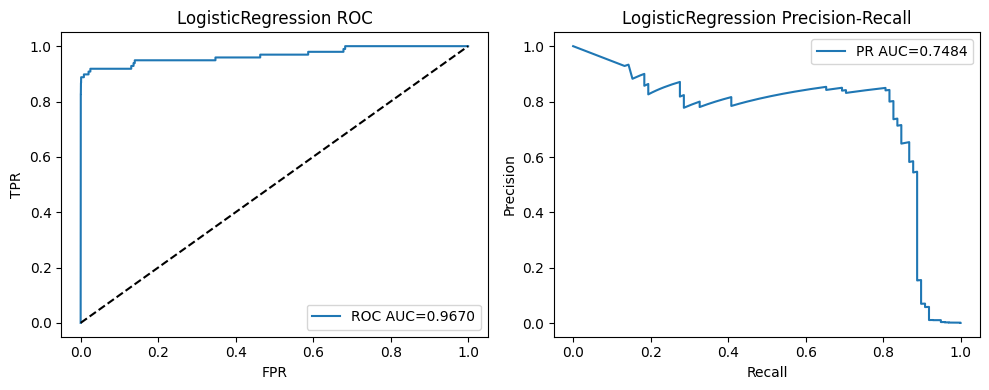

=== Model: RandomForest ===
              precision    recall  f1-score   support

           0     0.9997    0.9998    0.9998     56864
           1     0.8830    0.8469    0.8646        98

    accuracy                         0.9995     56962
   macro avg     0.9414    0.9234    0.9322     56962
weighted avg     0.9995    0.9995    0.9995     56962

Confusion matrix:
 [[56853    11]
 [   15    83]]
ROC AUC: 0.9812211269566915
PR AUC: 0.8848463850612325


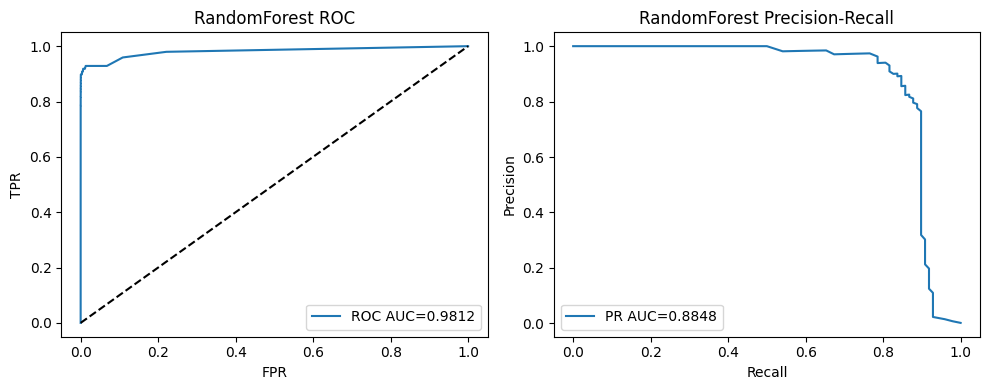

=== Model: XGBoost ===
              precision    recall  f1-score   support

           0     0.9998    0.9996    0.9997     56864
           1     0.7925    0.8571    0.8235        98

    accuracy                         0.9994     56962
   macro avg     0.8961    0.9284    0.9116     56962
weighted avg     0.9994    0.9994    0.9994     56962

Confusion matrix:
 [[56842    22]
 [   14    84]]
ROC AUC: 0.9789596444937007
PR AUC: 0.8704052869706037


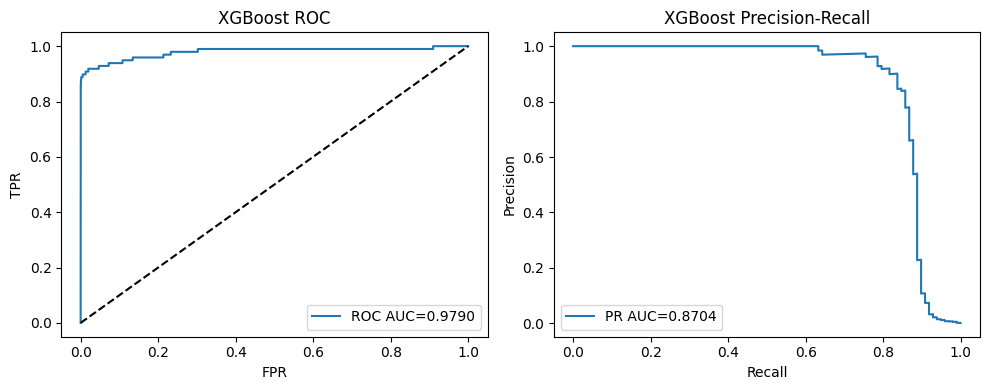

Summary: {'LogisticRegression': {'roc_auc': np.float64(0.9669732939602402), 'pr_auc': np.float64(0.748378105863927)}, 'RandomForest': {'roc_auc': np.float64(0.9812211269566915), 'pr_auc': np.float64(0.8848463850612325)}, 'XGBoost': {'roc_auc': np.float64(0.9789596444937007), 'pr_auc': np.float64(0.8704052869706037)}}


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve

def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]
    print("=== Model:", name, "===")
    print(classification_report(y_test, y_pred, digits=4))
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion matrix:\n", cm)
    print("ROC AUC:", roc_auc_score(y_test, y_proba))

    prec, rec, _ = precision_recall_curve(y_test, y_proba)
    pr_auc = auc(rec, prec)
    print("PR AUC:", pr_auc)

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(fpr, tpr, label=f'ROC AUC={roc_auc_score(y_test, y_proba):.4f}')
    plt.plot([0,1],[0,1],'k--')
    plt.title(name + " ROC")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(rec, prec, label=f'PR AUC={pr_auc:.4f}')
    plt.title(name + " Precision-Recall")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend()
    plt.tight_layout()
    plt.show()
    return {"roc_auc": roc_auc_score(y_test, y_proba), "pr_auc": pr_auc}

results = {}
for name, model in fitted.items():
    results[name] = evaluate_model(name, model, X_test, y_test)

print("Summary:", results)

In [10]:
import numpy as np

model = fitted['XGBoost']
y_proba = model.predict_proba(X_test)[:,1]
prec, rec, thresholds = precision_recall_curve(y_test, y_proba)

target_recall = 0.95
idxs = np.where(rec >= target_recall)[0]
if len(idxs) > 0:
    best_idx = idxs[np.argmax(prec[idxs])]
    best_threshold = thresholds[best_idx] if best_idx < len(thresholds) else 0.5
    print("Chosen threshold:", best_threshold, "precision at that recall:", prec[best_idx], "recall:", rec[best_idx])
else:
    print("No threshold yields recall >= ", target_recall)

Chosen threshold: 4.828146e-05 precision at that recall: 0.012150982419855223 recall: 0.9591836734693877


V14    0.184251
V10    0.125354
V17    0.117903
V12    0.105084
V16    0.080680
V3     0.064830
V11    0.058838
V4     0.056101
V2     0.029087
V7     0.019949
V9     0.019769
V21    0.015006
V18    0.012869
V27    0.011093
V5     0.008450
V13    0.008140
V1     0.008088
V19    0.008027
V8     0.007726
V26    0.007155
dtype: float64


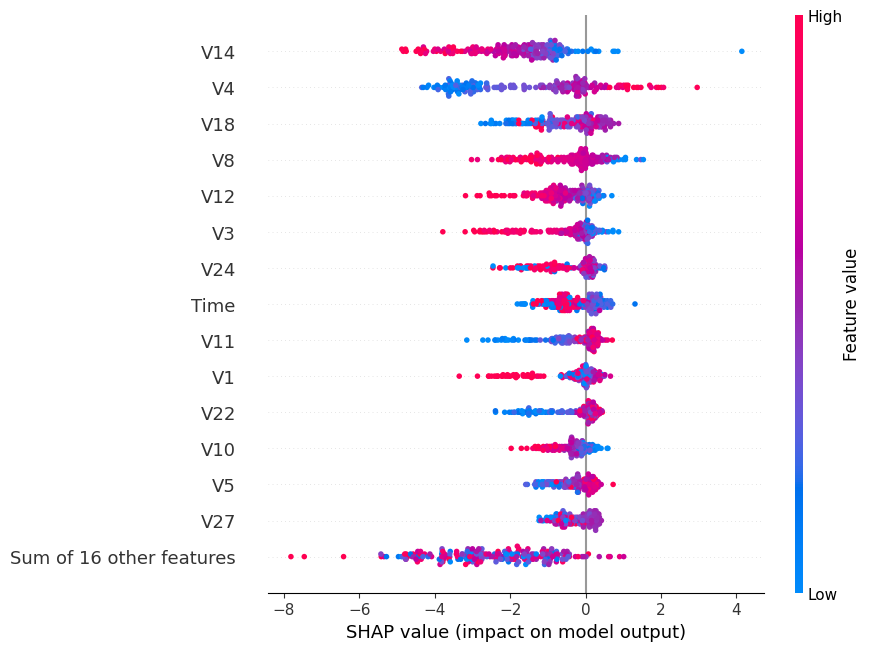

In [11]:
import pandas as pd

feat_names = X.columns.tolist()
rf = fitted['RandomForest']
imp = pd.Series(rf.feature_importances_, index=feat_names).sort_values(ascending=False)
print(imp.head(20))

import shap
explainer = shap.Explainer(fitted['XGBoost'])
sample = X_test.sample(200, random_state=42)
shap_values = explainer(sample)
shap.plots.beeswarm(shap_values, max_display=15)

In [12]:
import joblib
best_model = fitted['XGBoost']
joblib.dump(best_model, "/content/best_fraud_model.pkl")
joblib.dump(scaler, "/content/scaler_amount_time.pkl")
print("Saved model and scaler to /content/")

Saved model and scaler to /content/


In [13]:
from google.colab import files
files.download('/content/best_fraud_model.pkl')
files.download('/content/scaler_amount_time.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
%%writefile app.py
import streamlit as st
import joblib
import numpy as np
import pandas as pd

model = joblib.load("/content/best_fraud_model.pkl")
scaler = joblib.load("/content/scaler_amount_time.pkl")

st.title("Credit Card Fraud Detector - Demo")
st.write("Enter transaction features (use PCA features V1..V28, and Amount, Time). For quick demo we accept Amount and Time and set V1..V28 to 0.")

amount = st.number_input("Amount (raw)", value=100.0)
time = st.number_input("Time (seconds from first transaction)", value=10000.0)
uploaded = st.file_uploader("Or upload a CSV with columns V1..V28, Amount, Time", type=['csv'])
if uploaded is not None:
    df = pd.read_csv(uploaded)
    if not set(['Amount','Time']).issubset(df.columns):
        st.error("CSV must contain at least Amount and Time columns.")
    else:
        X = df.copy()
        X[['Amount','Time']] = scaler.transform(X[['Amount','Time']])
        proba = model.predict_proba(X)[:,1]
        df['fraud_probability'] = proba
        st.write(df.head())
else:
    row = {f"V{i}":0.0 for i in range(1,29)}
    row['Amount'] = amount
    row['Time'] = time
    import pandas as pd
    X = pd.DataFrame([row])
    X[['Amount','Time']] = scaler.transform(X[['Amount','Time']])
    p = model.predict_proba(X)[:,1][0]
    st.metric("Fraud probability", f"{p:.4f}")
    threshold = st.slider("Decision threshold", 0.0, 1.0, 0.5)
    label = "FRAUD" if p >= threshold else "LEGIT"
    st.write("Prediction at threshold {:.2f}: **{}**".format(threshold, label))

Writing app.py


In [18]:
!pkill -f ngrok || true
!pkill -f streamlit || true

^C
^C


In [19]:
import os
NGROK_AUTHTOKEN = "32E7Rn2n9rVdFKD7uV06sYCk3oC_4Frpjnyk6h6ppaW2rSeEZ"
os.environ['NGROK_AUTHTOKEN'] = NGROK_AUTHTOKEN
from pyngrok import ngrok
ngrok.set_auth_token(NGROK_AUTHTOKEN)

print("ngrok authtoken set in environment.")

ngrok authtoken set in environment.


In [20]:
!streamlit run app.py &>/content/streamlit.log &

from pyngrok import ngrok
tunnel = ngrok.connect(8501)
print("Streamlit public URL:", tunnel.public_url)

Streamlit public URL: https://55f6cfb93127.ngrok-free.app


In [21]:
!tail -n 200 /content/streamlit.log
from pyngrok import ngrok
print("Active tunnels:", ngrok.get_tunnels())

/bin/bash: line 1: streamlit: command not found
Active tunnels: [<NgrokTunnel: "https://55f6cfb93127.ngrok-free.app" -> "http://localhost:8501">]


In [22]:
!pkill -f ngrok || true
!pkill -f streamlit || true
!sleep 1

^C
^C


In [23]:
import os, textwrap
if os.path.exists("app.py"):
    print("app.py found. Showing first 200 lines:\n")
    with open("app.py","r", encoding="utf-8", errors="replace") as f:
        for i, line in enumerate(f):
            if i>199: break
            print(line.rstrip())
else:
    print("app.py not found in current directory. Upload or create it before starting Streamlit.")

app.py found. Showing first 200 lines:

import streamlit as st
import joblib
import numpy as np
import pandas as pd

model = joblib.load("/content/best_fraud_model.pkl")
scaler = joblib.load("/content/scaler_amount_time.pkl")

st.title("Credit Card Fraud Detector - Demo")
st.write("Enter transaction features (use PCA features V1..V28, and Amount, Time). For quick demo we accept Amount and Time and set V1..V28 to 0.")

amount = st.number_input("Amount (raw)", value=100.0)
time = st.number_input("Time (seconds from first transaction)", value=10000.0)
uploaded = st.file_uploader("Or upload a CSV with columns V1..V28, Amount, Time", type=['csv'])
if uploaded is not None:
    df = pd.read_csv(uploaded)
    if not set(['Amount','Time']).issubset(df.columns):
        st.error("CSV must contain at least Amount and Time columns.")
    else:
        X = df.copy()
        X[['Amount','Time']] = scaler.transform(X[['Amount','Time']])
        proba = model.predict_proba(X)[:,1]
        df['fraud_pr

In [27]:
!nohup streamlit run app.py --server.port 8501 --server.address 0.0.0.0 --server.headless true &> /content/streamlit.log & sleep 0.5
!echo "Started streamlit (logs -> /content/streamlit.log). Waiting 3s for startup..."
!sleep 3

Started streamlit (logs -> /content/streamlit.log). Waiting 3s for startup...


In [28]:
!tail -n 200 /content/streamlit.log || true
!ps aux | grep -E "streamlit|ngrok" | grep -v grep || true

nohup: failed to run command 'streamlit': No such file or directory


In [29]:
!curl -sS http://127.0.0.1:8501/ -I || true
!curl -sS http://localhost:8501/ -I || true

curl: (7) Failed to connect to 127.0.0.1 port 8501 after 0 ms: Connection refused
curl: (7) Failed to connect to localhost port 8501 after 0 ms: Connection refused


In [30]:
from pyngrok import ngrok, conf
tunnel = ngrok.connect(addr=8501, bind_tls=True)
print("ngrok tunnel:", tunnel.public_url)
print("Active tunnels:", ngrok.get_tunnels())

ngrok tunnel: https://3c388741546d.ngrok-free.app
Active tunnels: [<NgrokTunnel: "https://3c388741546d.ngrok-free.app" -> "http://localhost:8501">]
